In [9]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv("../Scripts/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


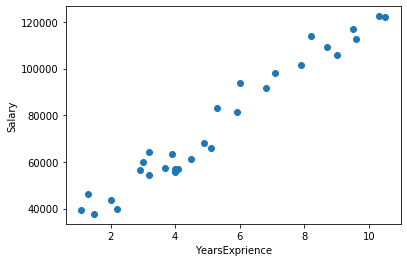

In [8]:
plt.scatter(data.YearsExperience,data.Salary)
plt.xlabel("YearsExprience")
plt.ylabel("Salary")
plt.show()

In [34]:
train,test=train_test_split(data,test_size=0.2)

X_train=torch.Tensor([[x] for x in list(train.YearsExperience)])
y_train=torch.FloatTensor([[x] for x in list(train.Salary)])

X_test=torch.Tensor([[x] for x in list(test.YearsExperience)])
y_test=torch.FloatTensor([[x] for x in list(test.Salary)])

In [26]:
a=[1,2,3]
b=torch.FloatTensor(a)
b

tensor([1., 2., 3.])

In [27]:
c=torch.tensor(a)
c

tensor([1, 2, 3])

In [29]:
targets = np.array([[56, 70], [81, 101], [119, 133], [22, 37], [103, 119], 
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119], 
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119]], dtype='float32')
targets

array([[ 56.,  70.],
       [ 81., 101.],
       [119., 133.],
       [ 22.,  37.],
       [103., 119.],
       [ 56.,  70.],
       [ 81., 101.],
       [119., 133.],
       [ 22.,  37.],
       [103., 119.],
       [ 56.,  70.],
       [ 81., 101.],
       [119., 133.],
       [ 22.,  37.],
       [103., 119.]], dtype=float32)

In [30]:
t=torch.from_numpy(targets)
t

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [35]:
X_train.dtype,X_test.dtype,y_train.dtype,y_test.dtype

(torch.float32, torch.float32, torch.float32, torch.float32)

In [36]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

(torch.Size([24, 1]),
 torch.Size([6, 1]),
 torch.Size([24, 1]),
 torch.Size([6, 1]))

In [37]:
train_data=torch.utils.data.TensorDataset(X_train,y_train)
val_data=torch.utils.data.TensorDataset(X_test,y_test)

In [38]:
train_dl=torch.utils.data.DataLoader(train_data,batch_size=64,shuffle=True)
val_dl=torch.utils.data.DataLoader(val_data,batch_size=64)

In [39]:
class LinearRegression(nn.Module):
    def __init__(self, in_size, out_size):
        super().__init__()
        self.lin = nn.Linear(in_features = in_size, out_features = out_size)
    def forward(self, X):
        pred = self.lin(X)
        return(pred)

In [40]:
model=LinearRegression(1,1)

In [42]:
#Define the loss function
loss_fun = nn.MSELoss()
# Define SGD optimizer with learning rate 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [43]:
def lrmodel(num_epochs, model, loss_fun, optimizer, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fun(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            optimizer.step()
            
            # 5. Reset the gradients to zero
            optimizer.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
#Training for 100 epochs
num_epochs=100
lrmodel(num_epochs, model, loss_fun, optimizer, train_dl)
# Generate predictions
preds = model(X_train)
preds
# Compare with targets
y_train

Epoch [10/100], Loss: 148015104.0000
Epoch [20/100], Loss: 138214944.0000
Epoch [30/100], Loss: 129200736.0000
Epoch [40/100], Loss: 120909416.0000
Epoch [50/100], Loss: 113282992.0000
Epoch [60/100], Loss: 106268176.0000
Epoch [70/100], Loss: 99815920.0000
Epoch [80/100], Loss: 93881128.0000
Epoch [90/100], Loss: 88422272.0000
Epoch [100/100], Loss: 83401160.0000


tensor([[ 56957.],
        [121872.],
        [122391.],
        [ 37731.],
        [ 63218.],
        [ 91738.],
        [ 54445.],
        [ 57189.],
        [109431.],
        [ 43525.],
        [105582.],
        [112635.],
        [ 56642.],
        [ 67938.],
        [ 57081.],
        [ 64445.],
        [ 60150.],
        [ 93940.],
        [ 66029.],
        [116969.],
        [ 81363.],
        [101302.],
        [ 46205.],
        [ 55794.]])

In [44]:
class Linear(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1) 
#         self.linear = nn.Linear(64, 9) 

        
    def forward(self, xb):
        out = self.linear(xb)                          
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        #loss = F.l1_loss(out, targets) 
        loss = F.mse_loss(out, targets)                          
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        #loss = F.l1_loss(out, targets)   
        loss = F.mse_loss(out, targets)                           
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean() 
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [45]:
model1=Linear()
model1

Linear(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [46]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [49]:
result = evaluate(model1, val_data) # Use the the evaluate function
print(result)

{'val_loss': 6065370624.0}


In [50]:
epochs = 100
lr = 1e-4
history1 = fit(epochs, lr, model1, train_data, val_data)

Epoch [20], val_loss: 172013344.0000
Epoch [40], val_loss: 142109328.0000
Epoch [60], val_loss: 137329600.0000
Epoch [80], val_loss: 133260056.0000
Epoch [100], val_loss: 129379912.0000
